# Linear Least Square Problems

We have seen in the class that various problems of fitting a polynomial to experimental data could be written as a quadratic program. 

Let's assume that we have collected $N$ data points as pairs $(x_i, y_i)$. These data points might be corrupted by noise and we would like to find a functional relationship between $x$ and $y$ as a polynomial of degree $K$
\begin{equation}
y = \sum_{k=0}^{K} a_k x^k
\end{equation}

For example, we might want to find a polynomial of degree 1 (i.e. a linear function)
$$ y = a_0 + a_1 x$$
that best explain the data. This means that we seek to find the coefficients $a_0$ and $a_1$ that best explain the data.

Assuming that the data has been corrupted by noise, we assume that for each data point we have
$$ y_i = \sum_{k=0}^{K} a_k x_i^k + e_i$$
where $e_i$ is the noise (or error) coming from sample $i$. Here we seek to find the values of the parameters $a_k$, for a given degree K such that the sum of square of the errors is minimized. This means that we want to solve the following problem
$$\min_{a_0 \cdots a_K} \sum_{i=0}^{N-1} e_i^2$$
which is equivalent to
$$\min_{a_0 \cdots a_K} \sum_{i=0}^{N-1} (\sum_{k=0}^{K} a_k x_i^k - y_i)^2$$
We can write these relations in matrix form by noticing that
$$\sum_{k=0}^{K} a_k x_i^k = \begin{bmatrix}1& x_i& x_i^2& \cdots& x_i^K\end{bmatrix}\begin{bmatrix}a_0\\ a_1 \\ a_2 \\ \vdots \\ a_K\end{bmatrix} $$
Using all the data points and the knowledge of the degree K and we can then construct the $N \times K$ matrix
$$ X = \begin{bmatrix} 1& x_0& x_0^2& \cdots& x_0^K \\ 1& x_1& x_1^2& \cdots& x_1^K \\ \vdots&\vdots&\vdots&\vdots&\vdots \\ 1& x_{N-1}& x_{N-1}^2& \cdots& x_{N-1}^K \end{bmatrix}$$
and the vector
$$Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_{N-1} \end{bmatrix}$$
where each row $i$ of $X$ and $Y$ is defined by the sample $i$ from the dataset.
We also write 
$$a = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_K \end{bmatrix}$$
We now have
$$Xa - Y = \begin{bmatrix} \sum_{k=0}^{K} a_k x_0^k - y_0 \\ \sum_{k=0}^{K} a_k x_1^k - y_1 \\ \vdots \\ \sum_{k=0}^{K} a_k x_{N-1}^k - y_{N-1} \end{bmatrix} $$
and the original problem can be written as
$$\min_a (Xa - Y)^T (Xa - Y)$$
which is equal to
$$\min_a a^T X^T X a - 2 Y^TXa + Y^2$$
The problem is the minimization of a quadratic function, which is convex, and therefore the necessary and sufficient conditions to find the minimum of the function is to find the value of $a$ that makes the gradient 0
$$\frac{\partial}{\partial a} \left(a^T X^T X a - 2 Y^TXa + Y^2 \right) = 2 X^T X a - 2X^T Y = 0$$
If the matrix $X^TX$ is full rank and we can invert it (which will be the case if there is enough data points which are different enough) then the solution to the problem is
$$ a = (X^T X)^{-1} X^T Y$$

## Examples - fitting a linear function
Here we generate a set of data from a linear function + noise and show how we can get an estimate of the function using the least square method

First we generate random data points from a linear function + Gaussian noise

Text(0.5, 1.0, 'Randomly generated data points')

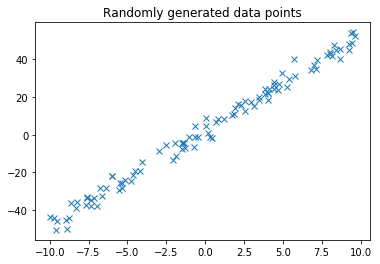

In [53]:
%matplotlib inline
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# generating 100 random data points
data_x = np.random.uniform(-10., 10., 100) # we randomly draw x uniformly
data_y = 5. * data_x + 2. + np.random.normal(scale=3.0, size=len(data_x)) # we add noise to y

plt.figure()
plt.plot(data_x, data_y, 'x')
plt.title('Randomly generated data points')

Now we can compute the least square fit  and get an estimate of $a_0$ and $a_1$. First we construct the regression matrices $X$ and $Y$ and then use the solution we computed above.

In [36]:
def do_regression(data_x, data_y, degree):
    """
    This function perform linear least squares to find a polynomial that fits the data
    
    Arguments:
    data_x: numpy array (1D) that contains the x data
    data_Y: numpy array (1D) that contains the y data
    degree: degree of  the polynomial to fit (1 is for a line)
    
    returns: an array of paramters for the fit
    """
    X = np.empty([len(data_x), degree+1])
    Y = np.empty([len(data_y)])
    # for each data point
    for i,x in enumerate(data_x):
        for j in range(degree+1):
            X[i,j] = x**j
        Y[i] = data_y[i]
    
    #construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    
    return a, fitting_error

***Fitting results***

the regressed values are 1.708617 and 4.950056

the fitting error is 820.732459

Text(0.5, 1.0, 'Randomly generated data points and fitted function')

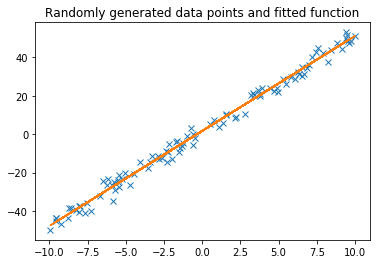

In [3]:
a, fitting_error = do_regression(data_x, data_y, 1)

display(Markdown('***Fitting results***'))
display(Markdown('the regressed values are ' + '%f'%a[0] + ' and ' + '%f'%a[1]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error))

plt.figure()
plt.plot(data_x, data_y, 'x')
plt.plot(data_x, a[0] + a[1]*data_x)
plt.title('Randomly generated data points and fitted function')

In the figure above we see in orange the recovered linear function from the data. Note here that we do not recover the true linear function but only an approximation. It is because the data has been corrupted by noise. You can try and see how this fit changes when noise increases or decreases.

In the following  we do the same with data points generated by a quadratic model and compare various fits

***Fitting results for the linear model***

the regressed values are 62.852589 and 1.271744

the fitting error is 370339.437127

***Fitting results for the quadratic model***

the regressed values are 0.676765, 1.444690 and 1.988481

the fitting error is 2034.612729

We notice that the fit of the quadratic model leads to a lower fitting error and a much better fit

Text(0.5, 1.0, 'Randomly generated data points and fitted linear and quadratic functions')

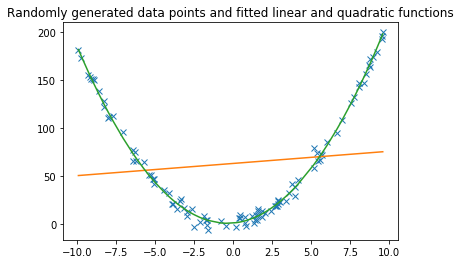

In [4]:
# generating 100 random data points
data_x = np.random.uniform(-10., 10., 100) # we randomly draw x uniformly
data_y = 2. * data_x**2 + 1.5*data_x + 1. + np.random.normal(scale=5.0, size=len(data_x)) # we add noise to y

# we now fit the data with a linear model
a, fitting_error = do_regression(data_x, data_y, 1)

# and we a quadratic model
b, fitting_error2 = do_regression(data_x, data_y, 2)

display(Markdown('***Fitting results for the linear model***'))
display(Markdown('the regressed values are ' + '%f'%a[0] + ' and ' + '%f'%a[1]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error))

display(Markdown('***Fitting results for the quadratic model***'))
display(Markdown('the regressed values are ' + '%f'%b[0] + ', ' + '%f'%b[1] + ' and ' + '%f'%b[2]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error2))
display(Markdown(''))
display(Markdown('We notice that the fit of the quadratic model leads to a lower fitting error and a much better fit'))

plt.figure()
# we sort the data to make the plot pretty
plot_x = np.sort(data_x)
plt.plot(data_x, data_y, 'x')
plt.plot(plot_x, a[0] + a[1]*plot_x)
plt.plot(plot_x, b[0] + b[1]*plot_x + b[2]*plot_x**2)
plt.title('Randomly generated data points and fitted linear and quadratic functions')

## Exercise 3 of Homework 1
### Part 1

In [10]:
def polynomial_func(x, k):
    xx = np.array([x**i for i in range(k.size)])
    return xx.dot(k)

def do_test(test_x, test_y, degree, a):
    X = np.empty([len(test_x), degree+1])
    # for each data point
    for i,x in enumerate(test_x):
        for j in range(degree+1):
            X[i,j] = x**j
    fitting_error = (X.dot(a) - test_y).dot(X.dot(a) - test_y)
    return fitting_error

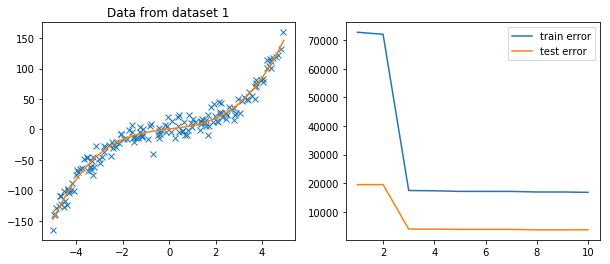

In [57]:
data1 = np.loadtxt('regression_dataset')

data_x = data1[:160,0]
data_y = data1[:160,1]

test_x = data1[160:,0]
test_y = data1[160:,1]
plot_x = np.sort(test_x)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data_x, data_y, 'x')
plt.title('Data from dataset 1')

# plt.figure()
a, fitting_error = do_regression(data1[:,0], data1[:,1], 3)
plot_x_all = np.sort(data1[:,0])
plt.plot(plot_x_all, [polynomial_func(point, a) for point in plot_x_all])

plt.subplot(1, 2, 2)
num_tests = 10
train_error = np.zeros((num_tests, 1))
test_error = np.zeros((num_tests, 1))
for i in range(num_tests):
    a, fitting_error = do_regression(data_x, data_y, i+1)
    train_error[i] = fitting_error
    test_error[i] = do_test(test_x, test_y, i+1, a)

plt.plot(np.arange(num_tests) + 1, train_error, label='train error')
plt.plot(np.arange(num_tests) + 1, test_error, label='test error')
plt.legend()

### Part 2

In [91]:
def do_regression_periodic(data_x, data_y, t):
    s = data_x.shape
    if len(s) == 1:
        N, K = s[0], 1
        data_x = data_x.reshape((N, K))
    else:
        N, K = s
    W = np.zeros((N, 2 * K + 1))
    Y = np.zeros((N))
    # for each data point
    for i,x in enumerate(data_x):
        W[i][0] = 1.
        for k in range(K):
            tmp = (k+1) * t * 2 * np.pi * data_x[i][k]
            W[i][k+1] = np.cos(tmp)
            W[i][k+1+K] = np.sin(tmp)
        Y[i] = data_y[i]
    WTW = W.transpose().dot(W)
    a = np.linalg.solve(WTW, W.transpose().dot(Y))
    fitting_error = (W.dot(a) - Y).dot(W.dot(a) - Y)
    return a, fitting_error


def do_test_periodic(test_x, test_y, t, a):
    predicted = np.array([periodic_func(p, a, t) for p in test_x])
    return (predicted - test_y).dot(predicted - test_y)
    

def periodic_func(x, a, t):
    K = (len(a) - 1) // 2
    x = x.reshape((K, 1))
    a0 = a[0]
    a1 = a[1:K+1]
    b1 = a[K+1:2*K+1]
    w = np.zeros((2 * K + 1))
    w[0] = 1.
    for k in range(K):
        tmp = (k+1) * t * 2 * np.pi * x[k]
        w[k+1] = np.cos(tmp)
        w[k+1+K] = np.sin(tmp)
    return w.dot(a)

236.99761972318257
345.2244805922578


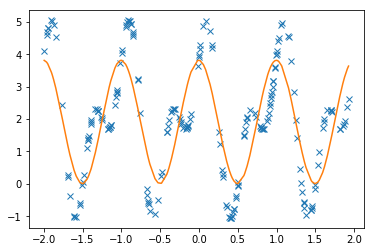

In [97]:
data2 = np.loadtxt('regression_dataset2')

data_x = data2[:,0]
data_y = data2[:,1]

plt.figure()
plt.plot(data_x, data_y, 'x')

a, fitting_error = do_regression_periodic(data_x, data_y, 1)
# a = np.array([1.91021086, 2.90038184, -0.03096971])
plot_x = np.sort(data_x)
plt.plot(plot_x, [periodic_func(p, a, 1) for p in plot_x])

print(do_test_periodic(data_x, data_y, 1, np.array([1.91021086, 1.90038184, -0.03096971])))
print(do_test_periodic(data_x, data_y, 1, np.array([1.91021086, 2.90038184, -0.03096971])))